In [ ]:
from tika import parser # pip install tika

raw = parser.from_file('/content/feng1999.pdf')
print(raw['content'])
































PII: S0926-2040(99)00019-3


Ž .Solid State Nuclear Magnetic Resonance 14 1999 81–90

Rotational resonance NMR of 13C -labelled retinal: quantitative2

internuclear distance determination

X. Feng a,1, P.J.E. Verdegem b,2, Y.K. Lee a,3, M. Helmle a,4, S.C. Shekar a,5,
H.J.M. de Groot b, J. Lugtenburg b, M.H. Levitt a,)

a Physical Chemistry DiÕision, Arrhenius Laboratory, Stockholm UniÕersity, Stockholm S-106 91, Sweden
b Leiden Institute of Chemistry, Gorlaeus Laboratories, Leiden UniÕersity, NL 2300 RA Leiden, Netherlands

Received 10 March 1999; accepted 21 April 1999

Abstract

w 13 xRotational resonance phenomena are investigated in the solid-state magic-angle spinning NMR of all-E- 11,20- C -reti-2

nal at a magnetic field of 4.7 T. We find good agreement between experiments and numerical simulations for the rotational
resonance spectral peakshapes and for the rotor-driven magnetization exchange. The internuclear distance between the
13 Ž .C-labelle

In [ ]:
pip install tika

  Preparing metadata (setup.py) ... done
  Created wheel for tika: filename=tika-2.6.0-py3-none-any.whl size=32621 sha256=049b62707d38fa142d22c2a4e86b655307fa1141095a4f4f04635f0d3fb0b1ff
  Stored in directory: /root/.cache/pip/wheels/5f/71/c7/b757709531121b1700cffda5b6b0d4aad095fb507ec84316d0
Successfully built tika


In [ ]:
def sample_abstractive_summarization() -> None:
    # [START abstract_summary]
    import os
    from azure.core.credentials import AzureKeyCredential
    from azure.ai.textanalytics import TextAnalyticsClient

    endpoint = "xxxx"
    key = "xxxx"

    text_analytics_client = TextAnalyticsClient(
        endpoint=endpoint,
        credential=AzureKeyCredential(key),
    )

    document = [raw['content']]

    poller = text_analytics_client.begin_abstract_summary(document)
    abstract_summary_results = poller.result()
    for result in abstract_summary_results:
        if result.kind == "AbstractiveSummarization":
            print("Summaries abstracted:")
            [print(f"{summary.text}\n") for summary in result.summaries]
        elif result.is_error is True:
            print("...Is an error with code '{}' and message '{}'".format(
                result.error.code, result.error.message
            ))
    # [END abstract_summary]


if __name__ == "__main__":
    sample_abstractive_summarization()

Summaries abstracted:
The document discusses the investigation of rotational resonance phenomena in the solid-state magic-angle spinning NMR of all-E-11,20-C-reti-2al at a magnetic field of 4.7 T. The study found good agreement between experiments and numerical simulations for the rotational resonance spectral peakshapes and for the rotor-driven magnetization exchange. The internuclear distance between the 13C-labelled C11 and C20 sites was determined to be 0.301"0.008 nm from rotational resonance spectra and 0.300"0.010 nm from rotor-driven magnetization trade. The document also discusses the use of solid-state NMR to determine molecular structure in difficult systems and the use of rotational resonance spectra to show perturbations from intermolecular homonuclear spin spin interactions.



In [ ]:
import pandas as pd

# Load data from local file
df_orig = pd.read_csv("/content/bbc-news-data.csv", delimiter='\t')
df = df_orig.copy()
# Show data
df

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


In [ ]:
import os

os.environ['OPENAI_API_KEY'] = 'xxxx'

In [ ]:
embedding_model = "text-embedding-ada-002"
embedding_encoding = "cl100k_base"  # this the encoding for text-embedding-ada-002
max_tokens = 8000

In [ ]:
from openai import OpenAI
client = OpenAI()


def get_embedding(text, model="text-embedding-ada-002"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model)['data'][0]['embedding']

df['ada_embedding'] = df.content.apply(lambda x: get_embedding(x, model='text-embedding-ada-002'))
#df.to_csv('output/embedded_1k_reviews.csv', index=False)

TypeError: ignored

In [ ]:
import matplotlib.

In [ ]:
df = pd.read_csv("/content/bbc-news-data-embedding_small.csv", sep='\t')

In [ ]:
import numpy as np

# convert string to array
df["embedding"] = df['embedding'].apply(eval).apply(np.array)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
vis_dims_pca = pca.fit_transform(df['embedding'].to_list())
vis_dims_pca.shape
# vis_dims_pca

df["vis_dims_pca"] = vis_dims_pca.tolist()

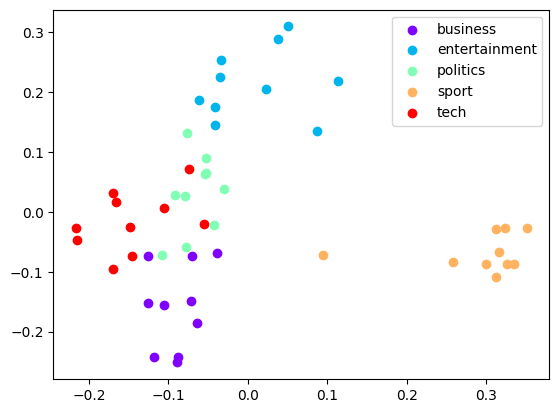

In [ ]:
import matplotlib.pyplot as plt

df[['x', 'y']] = pd.DataFrame(df['vis_dims_pca'].to_list(), index=df.index)

# Create a scatter plot with colors determined by 'category'
categories = df['category'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(categories)))

for i, category in enumerate(categories):
    df_category = df[df['category'] == category]
    plt.scatter(df_category['x'], df_category['y'], color=colors[i], label=category)

plt.legend()
plt.show()

In [ ]:
# First, we need to split the data for training and testing purposes
from sklearn.model_selection import train_test_split

# Now, we load full dataset
df = pd.read_csv("/content/bbc-news-data-embedding_full.csv", sep='\t')
# convert embedding column to array
df["embedding"] = df['embedding'].apply(eval).apply(np.array)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['embedding'], df['category'], test_size=0.2, random_state=42)

# train KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train.to_list(), y_train.to_list())

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test.to_list())

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Evaluating the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[108   0   5   0   2]
 [  2  68   0   0   2]
 [  0   0  75   0   1]
 [  1   0   0 101   0]
 [  1   2   2   0  75]]
               precision    recall  f1-score   support

     business       0.96      0.94      0.95       115
entertainment       0.97      0.94      0.96        72
     politics       0.91      0.99      0.95        76
        sport       1.00      0.99      1.00       102
         tech       0.94      0.94      0.94        80

     accuracy                           0.96       445
    macro avg       0.96      0.96      0.96       445
 weighted avg       0.96      0.96      0.96       445



Homework question #1: In this model, how many business news has been falsely identified as tech news?

Answer:2

Homework question #2: Explain what does 0.96 precision mean for business class?

Answer: inside predicted business class, the percentage of real business class

Homework question #3: Explain what does 0.94 recall mean for tech?

Answer: predicted tech class(Also real tech class) /real tech class

Homework question #4: Find a case where we need to recall as metric to measure model performance?

Answer: When we want to give some promotion to specific group of customers, I may spend more compared with seeing the precision, but I can cover more  customers I need.